In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd
import tex

In [2]:
def lin(x,m,b):
    return m*x+b

def get_wl(m,dm,d=1.51e-2,dd=.01e-2, f=30e-2, df=.5e-2):
    return m*d/f**2 , np.sqrt((dm*d/f**2)**2 +  (m*dd/f**2)**2 +  (2*m*d*df/f**3)**2)

def print_table(names, m,dm, lam,dlam):
    print(m)

    tex_m=[ "${:.2f} \pm {:.2f}$ ".format(m[i],dm[i]) for i in range(len(m))]
    tex_lam=[ "${:.2f} \pm {:.2f}$ ".format(lam[i],dlam[i]) for i in range(len(lam))]

    tex.get_table(["Lamp", "Gradient $m_{fit}$ $[mm^2]$", "Wavelength $\lambda_0$ $[nm]$"],[ names, tex_m, tex_lam ]  )
    return

[5.5769321120209101, 5.8572842293252094]
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
Lamp & Gradient $m_{fit}$ $[mm^2]$ & Wavelength $\lambda_0$ $[nm]$ \\ \hline\hline
Zinc & $5.58 \pm 0.10$  & $935.69 \pm 35.89$  \\ \hline
Cadminum & $5.86 \pm 0.12$  & $982.72 \pm 39.37$  \\ \hline
\hline
\end{tabular}
\caption{}
\label{}
\end{table}
None


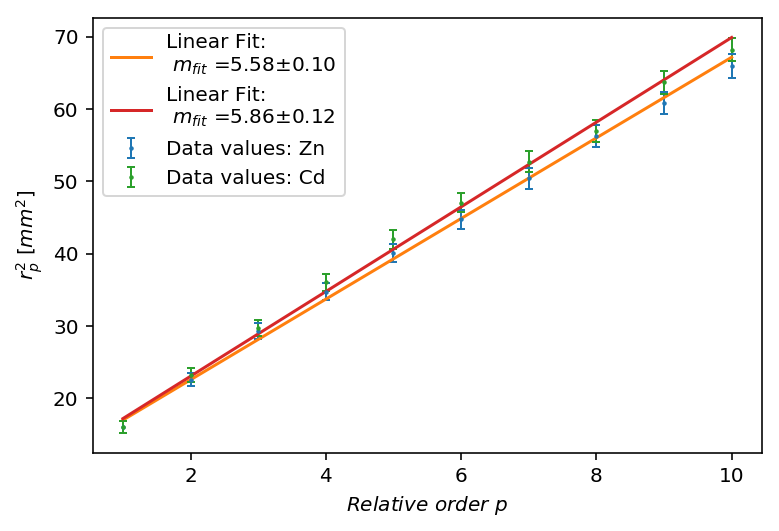

In [3]:
def lam_determination(name_array,anzahl=1,save_name=None,latex_names=None):
    fig,ax=plt.subplots(dpi=144)
    
    m,dm, m_si,dm_si=[],[],[],[]
    for name in name_array:
        data=pd.read_table("Data/{}.txt".format(name),skiprows=0)
        p= np.array(data.values[:,0]).astype(float) 
        r_p= np.array(data.values[:,1]).astype(float) # in mm

        dr_p=np.array([.1 for i in r_p])
        yerr= 2*r_p*dr_p

        popt,pcov=cf(lin, p,r_p**2,sigma=yerr, p0=[4,2])
        perr=np.sqrt(np.diag(pcov))
        
        m.append(popt[0])
        dm.append(perr[0])
        m_si.append(popt[0]*1e-6)
        dm_si.append(perr[0]*1e-6)

        xrange=np.linspace(min(p),max(p), 1000)
        
        ax.errorbar(p, r_p**2,yerr=yerr,ls=" ",lw=1,capsize=2,marker=".",markersize=2.5,  
                    label="Data values: {}".format(name[1:]))
        ax.plot(xrange,lin(xrange,*popt),label="Linear Fit:\n $m_{fit} $"+" ={:.2f}$\pm${:.2f}".format(popt[0],perr[0]))
        ax.set(xlabel="$Relative\ order\ p$",ylabel="$r_p^2\ [mm^2]$")
        ax.legend();
        
        
        
    if save_name != None: fig.savefig("Plots/{}.png".format(save_name))
    
    a,da=popt[0]*1e-6,perr[0]*1e-6 ## Umrechnung in Si Einheiten

    if latex_names != None:
        lam,dlam= get_wl(np.array(m_si)*1e9,np.array(dm_si)*1e9)
        print_table(latex_names, m,dm, lam,dlam )
    
    if len(name_array) !=1: return
    return get_wl(a,da)

#print(lam_determination(["4Cd"],save_name="Lambda_Cd"))
#print(lam_determination(["4Zn"],save_name="Lambda_Zn"))

print(lam_determination(["4Zn","4Cd"],save_name="Lambda_Cd_Zn",latex_names=["Zinc","Cadminum"]))

2334.02503879467

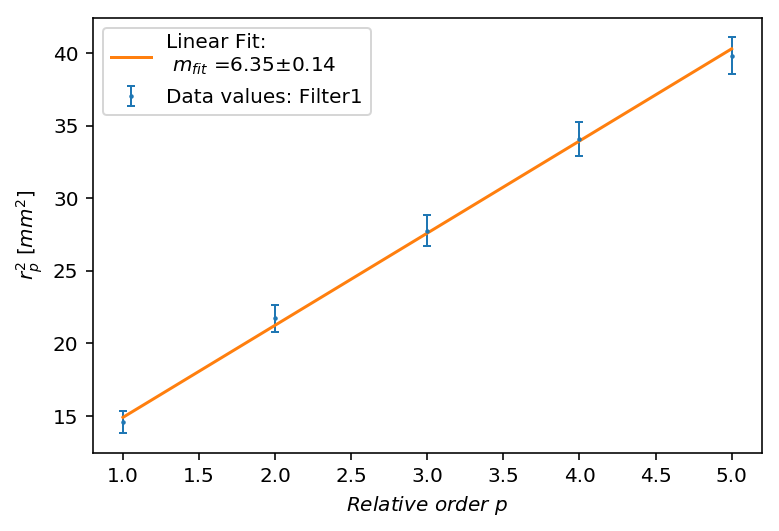

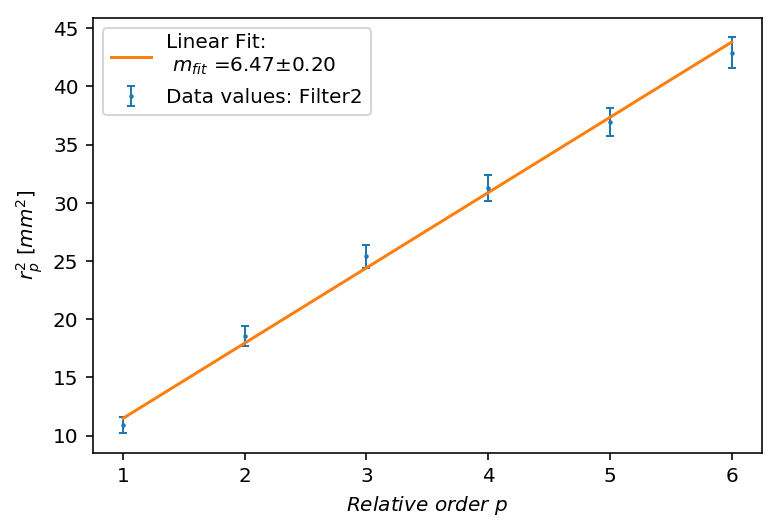

In [4]:
lam1,dlam1 = lam_determination(["7Filter1"])
lam2,dlam2 = lam_determination(["7Filter2"])

lam1,lam2=640e-9,650e-9

B=194e-3

2*np.pi*c.c / B * (1/lam1 - 1/lam2) *1e-11 # DIfferenz der beiden reziproken lambda Werte zo groß, daher faktor e3 zu viel

[6.351173003235818, 6.4688704282103071]
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
Lamp & Gradient $m_{fit}$ $[mm^2]$ & Wavelength $\lambda_0$ $[nm]$ \\ \hline\hline
$\sigma^+$ & $6.35 \pm 0.14$  & $1065.59 \pm 43.37$  \\ \hline
$\sigma^-$ & $6.47 \pm 0.20$  & $1085.33 \pm 49.86$  \\ \hline
\hline
\end{tabular}
\caption{}
\label{}
\end{table}


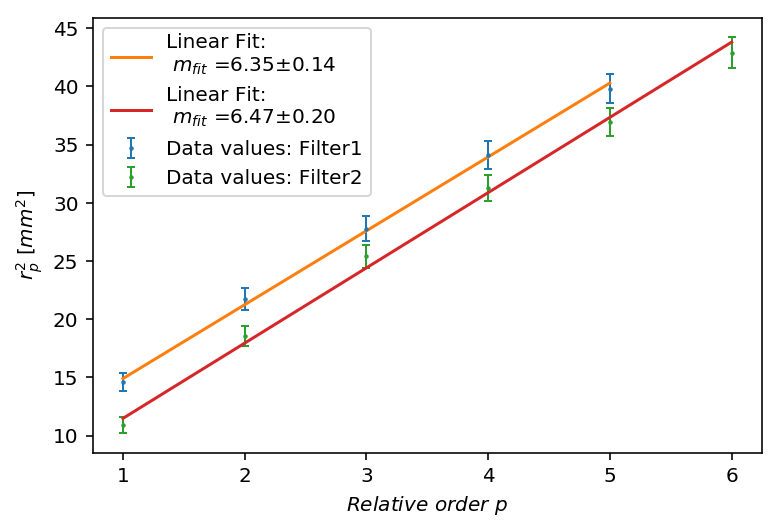

In [5]:
lam_determination(["7Filter1","7Filter2"],save_name="Both_Filters",latex_names=["$\sigma^+$","$\sigma^-$"])

[8.299618431982978, 7.3749275699101204]
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
Lamp & Gradient $m_{fit}$ $[mm^2]$ & Wavelength $\lambda_0$ $[nm]$ \\ \hline\hline
$\sigma^+$ & $8.30 \pm 0.75$  & $1392.49 \pm 133.95$  \\ \hline
$\sigma^-$ & $7.37 \pm 0.35$  & $1237.35 \pm 72.47$  \\ \hline
\hline
\end{tabular}
\caption{}
\label{}
\end{table}


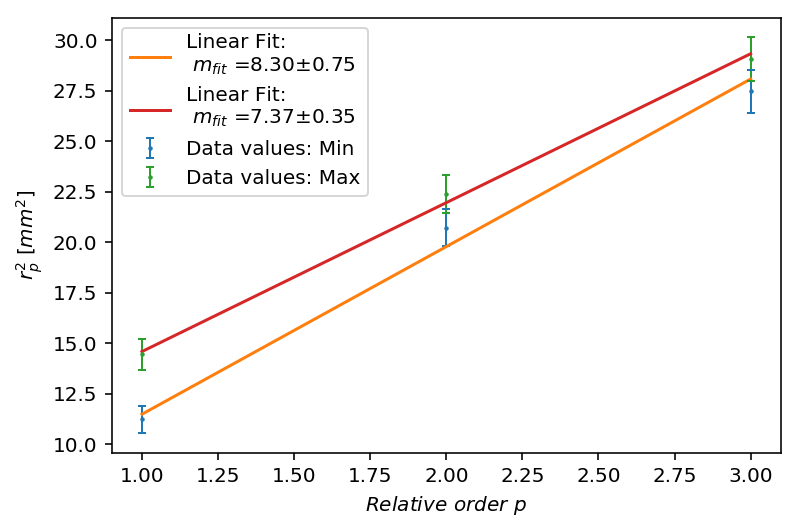

In [6]:
# lam_determination(["8Min","8Max"],save_name="Res_Cap",latex_names=["$\sigma^+$","$\sigma^-$"])